In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Walmart.csv')

In [4]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
#df.set_index('Date', inplace=True)

In [6]:
df.shape

(6435, 8)

In [7]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

## **EDA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

## **Visualization**

#### Weekly sales Distribution

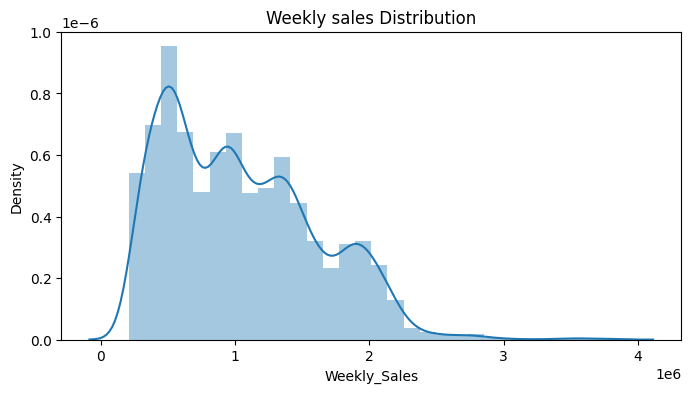

In [12]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Weekly sales Distribution')
plt.show()

## **Outlier Analysis**

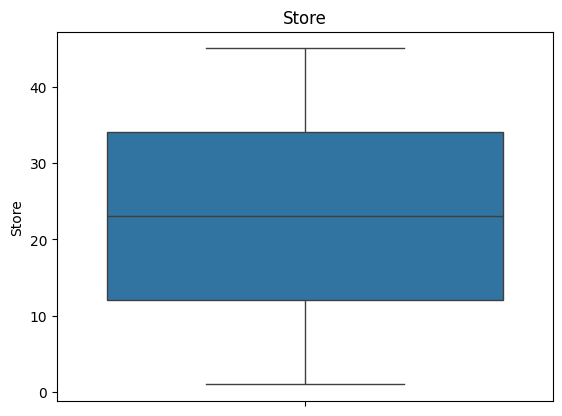

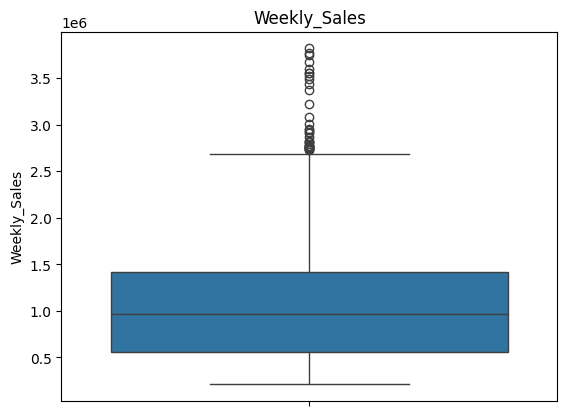

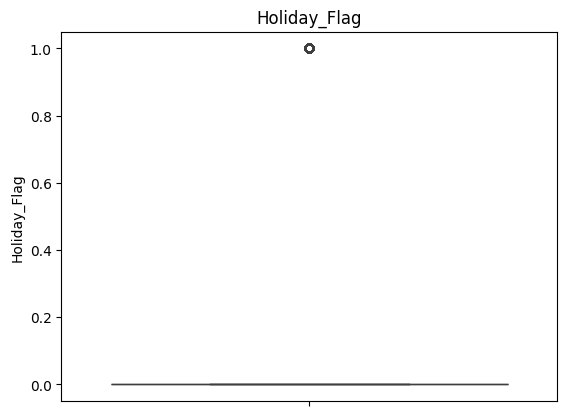

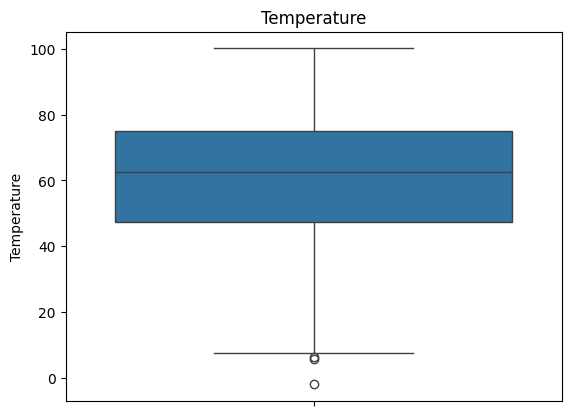

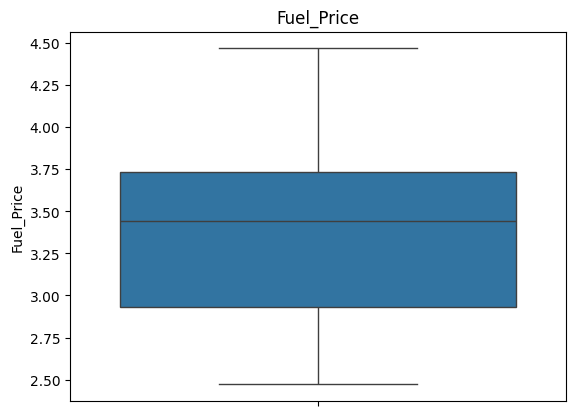

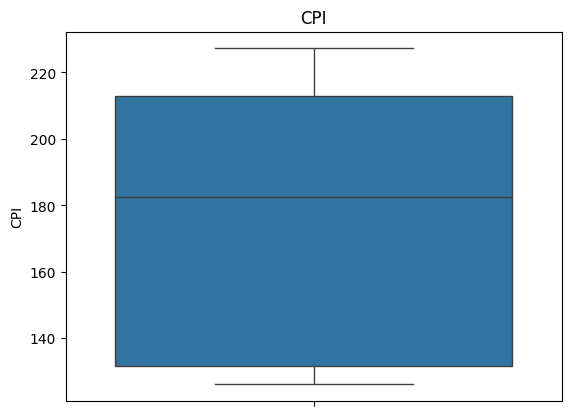

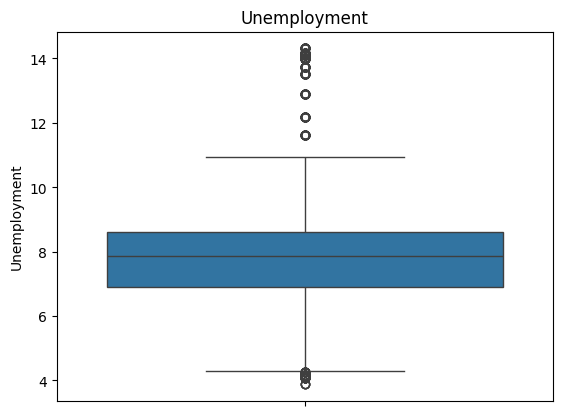

In [13]:
for x in df.columns:
    if df[x].dtype != 'object':
        sns.boxplot(df[x])
        plt.title(x)
        plt.show()

In [14]:
out_list = []

for x in df.columns:
    if df[x].dtype != 'object' and x != 'Holiday_Flag':
        out_list.append(x)

In [15]:
out_list

['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [16]:
for x in out_list:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)

    IQR = Q3 - Q1

    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR

    df = df[(df[x] >= LL) & (df[x] <= UL)]
    

In [17]:
df.shape

(5917, 8)

## **Correlation**

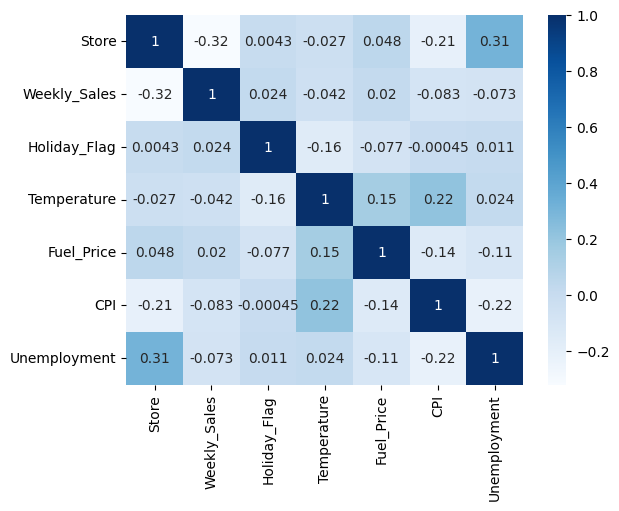

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'Blues')
plt.show()

#### -------------------------------------------------------------------------------------------------------------------------------------------

**a. If the weekly sales are affected by the unemployment rate, 
          if yes - which stores 
are suffering the most**

**-Relationship between Weeklysales and Unemployment**

In [19]:
correlation_unemployment = df['Weekly_Sales'].corr(df['Unemployment'])
print(f'Overall Correlation between Weekly Sales and Unemployment: {correlation_unemployment}')

Overall Correlation between Weekly Sales and Unemployment: -0.07309164834106416


#### As unemployment `increases`, weekly sales `decrease` significantly for that store

**-Store Specific Correlation**

In [20]:
store_unemployment_corr = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Unemployment'])).reset_index().rename(columns={0: 'Unemployment_Correlation'})

In [21]:
store_unemployment_corr

Store  Unemployment_Correlation
0       1                 -0.097955
1       2                  0.054288
2       3                 -0.230413
3       4                 -0.633422
4       5                 -0.207043
5       6                  0.016833
6       7                 -0.165131
7       8                 -0.052580
8       9                 -0.191534
9      10                  0.186979
10     11                 -0.020339
11     12                  0.015141
12     13                 -0.400254
13     14                  0.269510
14     15                  0.078905
15     16                 -0.070864
16     17                 -0.279019
17     18                  0.139179
18     19                  0.101464
19     20                 -0.109391
20     21                  0.218367
21     22                  0.039043
22     23                 -0.231551
23     24                 -0.012261
24     25                 -0.004958
25     26                 -0.066556
26     27                 -0.002535
27     28                 -0.066340
28     29                  0.084682
29     30                  0.201862
30     31                 -0.064738
31     32                 -0.099455
32     33                  0.101175
33     34                  0.017010
34     35                  0.483865
35     36                  0.833734
36     37                 -0.221287
37     38                 -0.069747
38     39                 -0.384681
39     40                 -0.213724
40     41                 -0.350630
41     42                 -0.356355
42     43                 -0.201954
43     44                 -0.780076
44     45                 -0.004041

**-Most Affected Stores**

In [22]:
most_affected_stores = store_unemployment_corr.sort_values(by = 'Unemployment_Correlation')

In [23]:
most_affected_stores.head()

Store  Unemployment_Correlation
43     44                 -0.780076
3       4                 -0.633422
12     13                 -0.400254
38     39                 -0.384681
41     42                 -0.356355

In [24]:
print('Most Affected stores by Unemployment (Neg Correlation)')
print(most_affected_stores.head().set_index('Store'))

Most Affected stores by Unemployment (Neg Correlation)
       Unemployment_Correlation
Store                          
44                    -0.780076
4                     -0.633422
13                    -0.400254
39                    -0.384681
42                    -0.356355


#### ------------------------------------------------------------------------------------------------------------------------------------------------

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [26]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [27]:
df.head(2)

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   

          CPI  Unemployment  Month  Year  
0  211.096358         8.106      2  2010  
1  211.242170         8.106      2  2010

**-Analysing Monthly Sales Trend**

In [28]:
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().unstack()

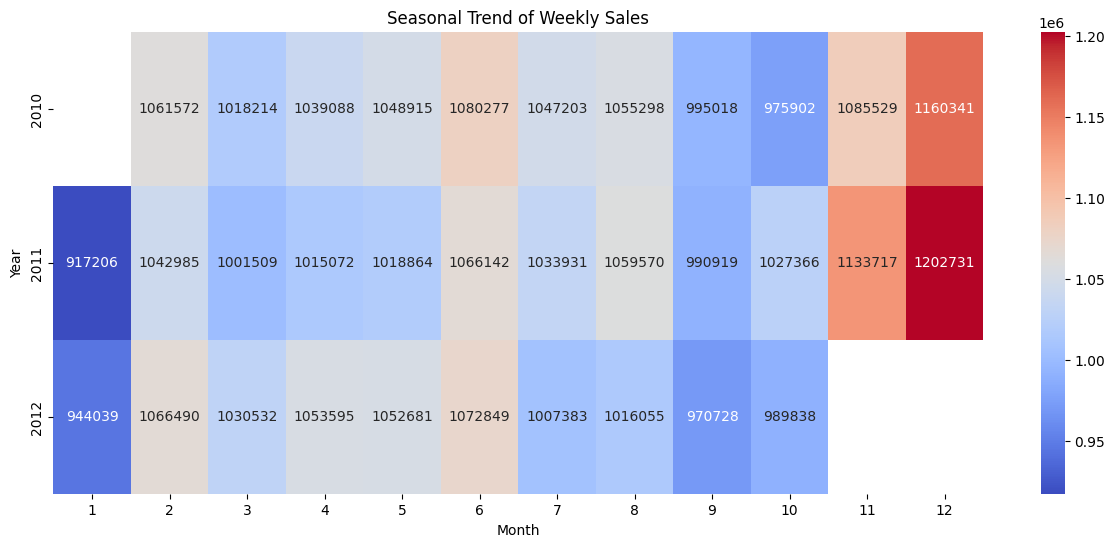

In [29]:
plt.figure(figsize=(15,6))
sns.heatmap(monthly_sales, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Seasonal Trend of Weekly Sales')
plt.show()

#### *Heatmap shows months were sales are `Higher` or `Lower` across the year. This shows the `seasonal trend` in data*

**-Sales by Month across all years**

In [30]:
avg_monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

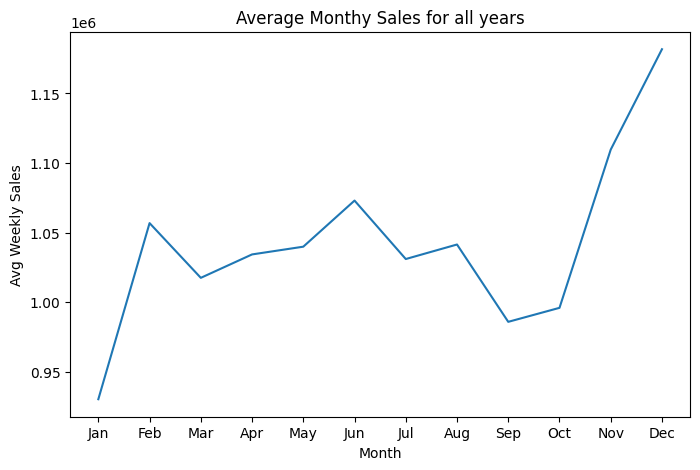

In [31]:
plt.figure(figsize=(8,5))
sns.lineplot(avg_monthly_sales)
plt.title('Average Monthy Sales for all years')
plt.ylabel('Avg Weekly Sales')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### *Line plot shows there are specific months where sales consistently `Increases` or `Decreases`*

**Possible Reasons for Seasonal Trend**
* `Holidays`: Higher sales in `Nov` and `Dec` corresponds to holiday season. Such as Christmas, Thanksgiving etc.
* `Weather Related Sales` : Temperature change might impact sales. e.g Summer Clothes etc
* `Back-to-School Season` : There is inc in sales in month of `June` may correspond to back to school season.

**c. Does temperature affect the weekly sales in any manner?**

In [32]:
correlation_temperature = df['Weekly_Sales'].corr(df['Temperature'])
print(f'Overall Correlation between Weekly Sales and Temperature: {correlation_temperature}')

Overall Correlation between Weekly Sales and Temperature: -0.041686039544644324


#### As Temperature `increases`, weekly sales `decrease` significantly for that store

**-Store Specific Correlation**

In [33]:
store_temperature_corr = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['Temperature'])).reset_index().rename(columns={0: 'Temperature_Correlation'})

In [34]:
most_affected_stores_temp = store_temperature_corr.sort_values(by = 'Temperature_Correlation')

In [35]:
most_affected_stores_temp

Store  Temperature_Correlation
9      10                -0.475243
2       3                -0.377524
29     30                -0.330816
7       8                -0.312324
36     37                -0.300493
33     34                -0.278523
10     11                -0.278503
1       2                -0.272249
30     31                -0.262192
0       1                -0.222701
8       9                -0.208343
44     45                -0.201945
20     21                -0.177084
4       5                -0.175517
41     42                -0.151639
17     18                -0.144278
28     29                -0.129144
3       4                -0.114243
31     32                -0.111681
35     36                -0.094454
21     22                -0.082892
13     14                -0.082329
18     19                -0.080805
19     20                -0.073785
5       6                -0.050596
14     15                -0.050541
24     25                -0.031311
39     40                -0.005641
6       7                 0.013383
22     23                 0.014017
32     33                 0.019244
34     35                 0.043392
38     39                 0.064738
37     38                 0.068122
42     43                 0.095272
40     41                 0.106761
23     24                 0.111833
16     17                 0.112270
27     28                 0.161447
12     13                 0.181859
15     16                 0.182948
25     26                 0.190021
11     12                 0.210494
26     27                 0.262541
43     44                 0.267822

**-Most Affected Stores**

In [36]:
print('Most Affected stores by temperature (Neg Correlation)')
print(most_affected_stores_temp.head().set_index('Store'))

Most Affected stores by temperature (Neg Correlation)
       Temperature_Correlation
Store                         
10                   -0.475243
3                    -0.377524
30                   -0.330816
8                    -0.312324
37                   -0.300493


**d. How is the Consumer Price index affecting the weekly sales of various stores?**

In [37]:
correlation_cpi = df['Weekly_Sales'].corr(df['CPI'])
print(f'Overall Correlation between Weekly Sales and CPI: {correlation_cpi}')

Overall Correlation between Weekly Sales and CPI: -0.08297669066596987


#### As CPI `increases`, weekly sales `decrease` significantly for that store

**-Store Specific Correlation**

In [38]:
store_cpi_corr = df.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x['CPI'])).reset_index().rename(columns={0: 'CPI_Correlation'})

In [39]:
store_cpi_corr

Store  CPI_Correlation
0       1         0.225408
1       2        -0.063786
2       3         0.317250
3       4         0.669028
4       5         0.308261
5       6         0.033524
6       7         0.288948
7       8         0.120255
8       9         0.294805
9      10        -0.130205
10     11         0.069781
11     12        -0.234084
12     13         0.401445
13     14        -0.498495
14     15        -0.174467
15     16         0.124285
16     17         0.362670
17     18        -0.193541
18     19        -0.155341
19     20         0.203508
20     21        -0.163649
21     22        -0.038602
22     23         0.256672
23     24        -0.013684
24     25        -0.010914
25     26         0.123580
26     27        -0.235769
27     28        -0.121498
28     29        -0.072530
29     30        -0.298188
30     31         0.132887
31     32         0.196782
32     33        -0.052271
33     34         0.115437
34     35        -0.424107
35     36        -0.915095
36     37         0.244507
37     38        -0.109557
38     39         0.428043
39     40         0.225123
40     41         0.392293
41     42         0.360859
42     43        -0.285686
43     44         0.740150
44     45        -0.023548

In [40]:
most_affected_stores_cpi = store_cpi_corr.sort_values(by = 'CPI_Correlation')

In [41]:
most_affected_stores_cpi

Store  CPI_Correlation
35     36        -0.915095
13     14        -0.498495
34     35        -0.424107
29     30        -0.298188
42     43        -0.285686
26     27        -0.235769
11     12        -0.234084
17     18        -0.193541
14     15        -0.174467
20     21        -0.163649
18     19        -0.155341
9      10        -0.130205
27     28        -0.121498
37     38        -0.109557
28     29        -0.072530
1       2        -0.063786
32     33        -0.052271
21     22        -0.038602
44     45        -0.023548
23     24        -0.013684
24     25        -0.010914
5       6         0.033524
10     11         0.069781
33     34         0.115437
7       8         0.120255
25     26         0.123580
15     16         0.124285
30     31         0.132887
31     32         0.196782
19     20         0.203508
39     40         0.225123
0       1         0.225408
36     37         0.244507
22     23         0.256672
6       7         0.288948
8       9         0.294805
4       5         0.308261
2       3         0.317250
41     42         0.360859
16     17         0.362670
40     41         0.392293
12     13         0.401445
38     39         0.428043
3       4         0.669028
43     44         0.740150

**-Most Affected Stores**

In [42]:
print('Most Affected stores by CPI (Neg Correlation)')
print(most_affected_stores_cpi.head().set_index('Store'))

Most Affected stores by CPI (Neg Correlation)
       CPI_Correlation
Store                 
36           -0.915095
14           -0.498495
35           -0.424107
30           -0.298188
43           -0.285686


*The above stores are sensitive to changes in CPI, possibly due to the `type of products sold` or `the local economy`*

**e. Top performing stores according to the historical data**

In [43]:
store_performance = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [44]:
store_performance.head()

Store  Weekly_Sales
0      1  2.224028e+08
1      2  2.687221e+08
2      3  5.758674e+07
3      4  2.446487e+08
4      5  4.547569e+07

In [45]:
top_stores = store_performance.sort_values(by = 'Weekly_Sales', ascending=False)

In [46]:
print('Top 5 performing Stores by Total Sales:')
print(top_stores.head())

Top 5 performing Stores by Total Sales:
    Store  Weekly_Sales
19     20  2.800237e+08
13     14  2.761276e+08
1       2  2.687221e+08
12     13  2.682025e+08
9      10  2.556789e+08


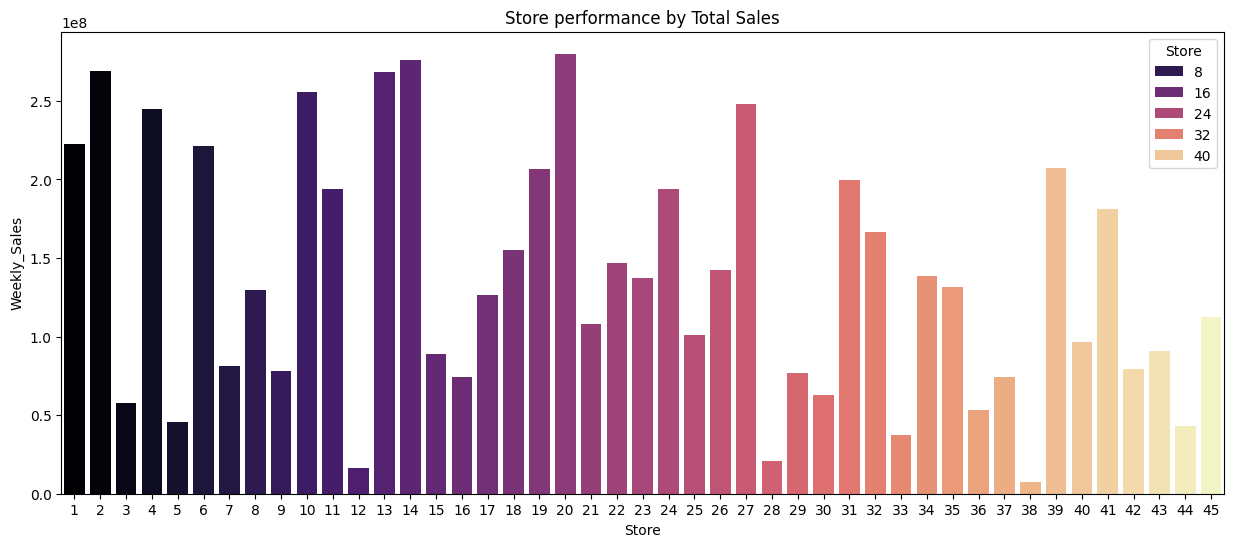

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(data=top_stores, x = 'Store', y= 'Weekly_Sales', hue= 'Store', palette='magma')
plt.title('Store performance by Total Sales')
plt.show()

**f. The worst performing store, and how significant is the difference between the 
highest and lowest performing stors**.


In [48]:
worst_stores = store_performance.sort_values(by = 'Weekly_Sales', ascending=True)

In [49]:
print('Top 5 performing Stores by Total Sales:')
print(worst_stores.head())

Top 5 performing Stores by Total Sales:
    Store  Weekly_Sales
37     38    7347378.89
11     12   16386710.79
27     28   21106767.80
32     33   37160221.96
43     44   43293087.84


**-difference between the highest and lowest performing stores**

In [50]:
top_store = top_stores['Weekly_Sales'].head(1).values[0]
top_store

280023734.81

In [51]:
worst_store = worst_stores['Weekly_Sales'].head(1).values[0]
worst_store

7347378.89

In [52]:
performance_difference = top_store - worst_store

In [53]:
performance_difference

272676355.92

In [54]:
print(f'The difference in total sales between the highest and lowest performing stores is: {performance_difference}')

The difference in total sales between the highest and lowest performing stores is: 272676355.92


**Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

--*Preparing Data*

In [55]:
store_sales = df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
store_sales

Store       Date  Weekly_Sales
0         1 2010-02-05    1643690.90
1         1 2010-02-12    1641957.44
2         1 2010-02-19    1611968.17
3         1 2010-02-26    1409727.59
4         1 2010-03-05    1554806.68
...     ...        ...           ...
5912     45 2012-09-28     713173.95
5913     45 2012-10-05     733455.07
5914     45 2012-10-12     734464.36
5915     45 2012-10-19     718125.53
5916     45 2012-10-26     760281.43

[5917 rows x 3 columns]

In [56]:
store_sales = store_sales.set_index('Date').sort_index()

In [57]:
store_sales

Store  Weekly_Sales
Date                           
2010-02-05      1    1643690.90
2010-02-05     27    1874289.79
2010-02-05      4    2135143.87
2010-02-05     29     538634.46
2010-02-05     30     465108.52
...           ...           ...
2012-10-26     18    1127516.25
2012-10-26     19    1322117.96
2012-10-26     41    1316542.59
2012-10-26     13    2035189.66
2012-10-26     45     760281.43

[5917 rows x 2 columns]

--*Preparing Data for each Store*

In [58]:
forecast_results = {}

for store in store_sales['Store'].unique():
    store_data = store_sales[store_sales['Store'] == store].drop(columns=['Store'])
    store_data = store_data.resample('W-MON').sum()
    store_data['Weekly_Sales'].fillna(method='ffill', inplace=True)
    forecast_results[store] = store_data

In [59]:
forecast_results

{1:             Weekly_Sales
 Date                    
 2010-02-08    1643690.90
 2010-02-15    1641957.44
 2010-02-22    1611968.17
 2010-03-01    1409727.59
 2010-03-08    1554806.68
 ...                  ...
 2012-10-01    1437059.26
 2012-10-08    1670785.97
 2012-10-15    1573072.81
 2012-10-22    1508068.77
 2012-10-29    1493659.74
 
 [143 rows x 1 columns],
 27:             Weekly_Sales
 Date                    
 2010-02-08    1874289.79
 2010-02-15    1745362.72
 2010-02-22    1945070.33
 2010-03-01    1390934.27
 2010-03-08    1313729.72
 ...                  ...
 2012-10-01    1540687.63
 2012-10-08    1591816.88
 2012-10-15    1660081.29
 2012-10-22    1620374.24
 2012-10-29    1703047.74
 
 [143 rows x 1 columns],
 4:             Weekly_Sales
 Date                    
 2010-02-08    2135143.87
 2010-02-15    2188307.39
 2010-02-22    2049860.26
 2010-03-01    1925728.84
 2010-03-08    1971057.44
 ...                  ...
 2012-06-04    2179360.94
 2012-06-11    2245257.18


--*Splitting Data*

In [60]:
for store, data in forecast_results.items():
    train_data = data[:-12]
    test_data = data[-12:]

    forecast_results[store] = { 'train_data': train_data, 'test_data': test_data}

--**ARIMA Model**

In [61]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
for store, datasets in forecast_results.items():
    train_data = datasets['train_data']

    model = ARIMA(train_data, order=(5,1,2))
    model = model.fit()

    forecast_results[store]['model'] = model

--**Forecasting for next 12 weeks**

In [64]:
for store, datasets in forecast_results.items():
    model = datasets['model']

    forecast = model.forecast(steps=12)

    forecast_results[store]['forecast'] = forecast

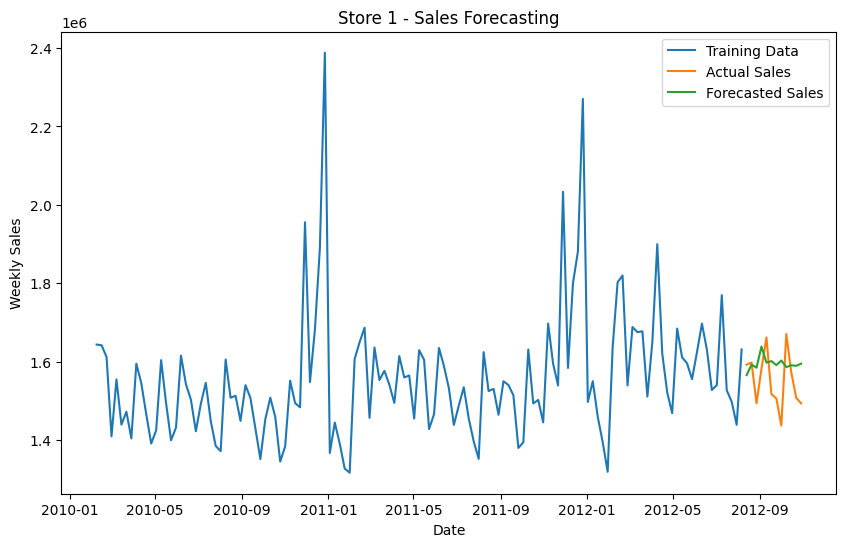

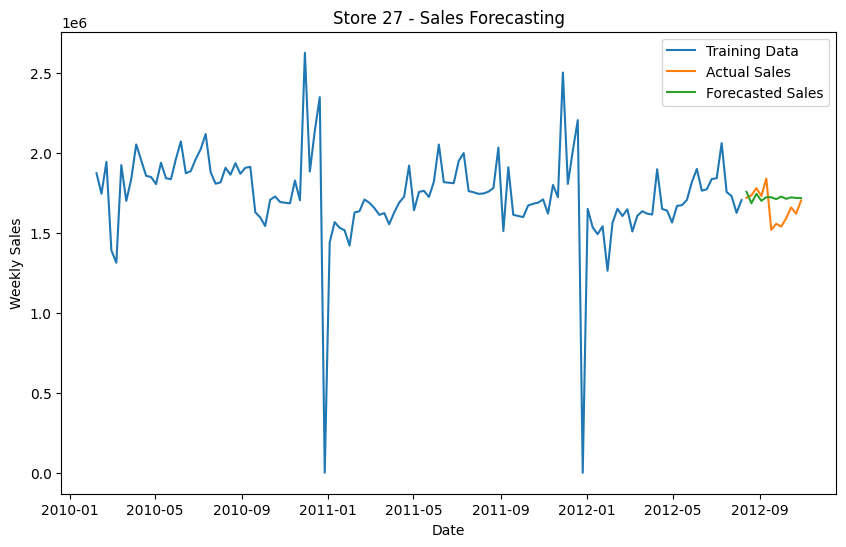

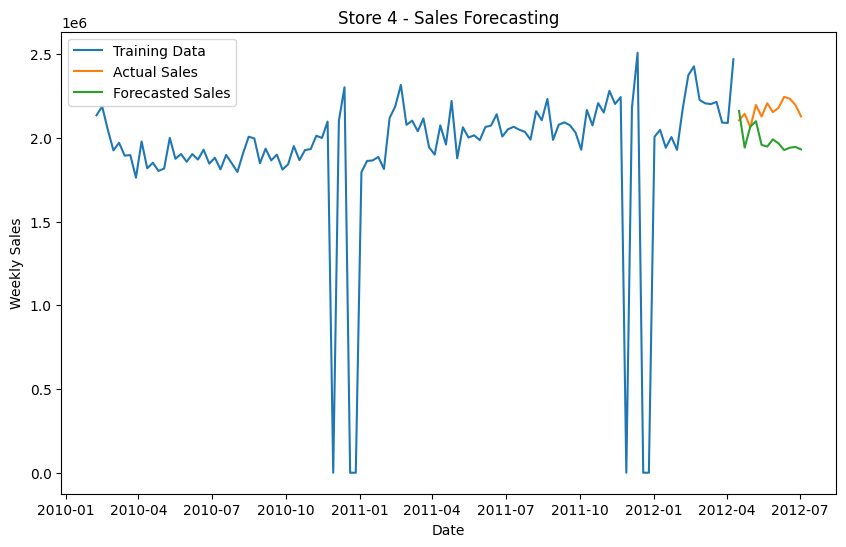

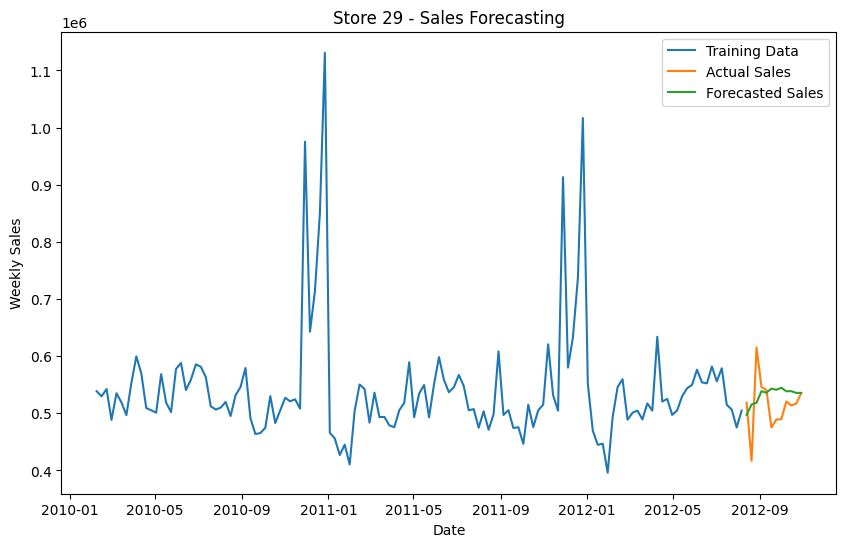

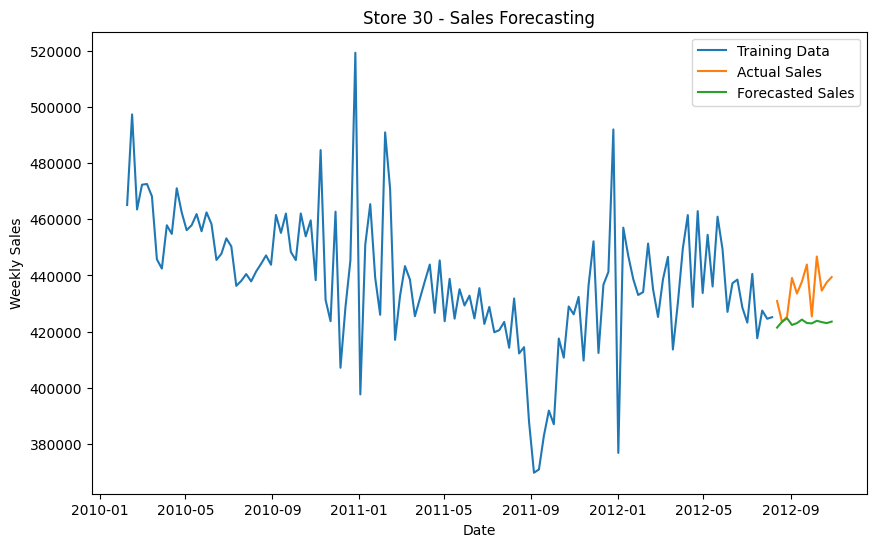

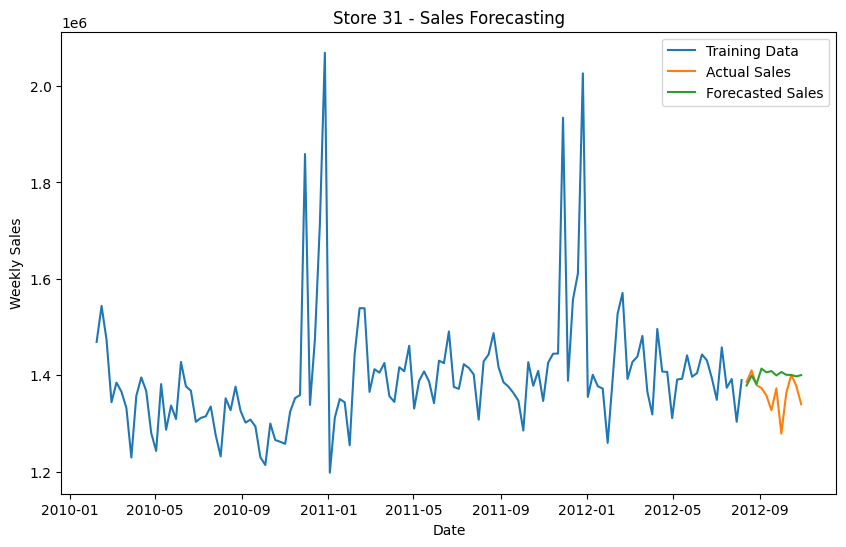

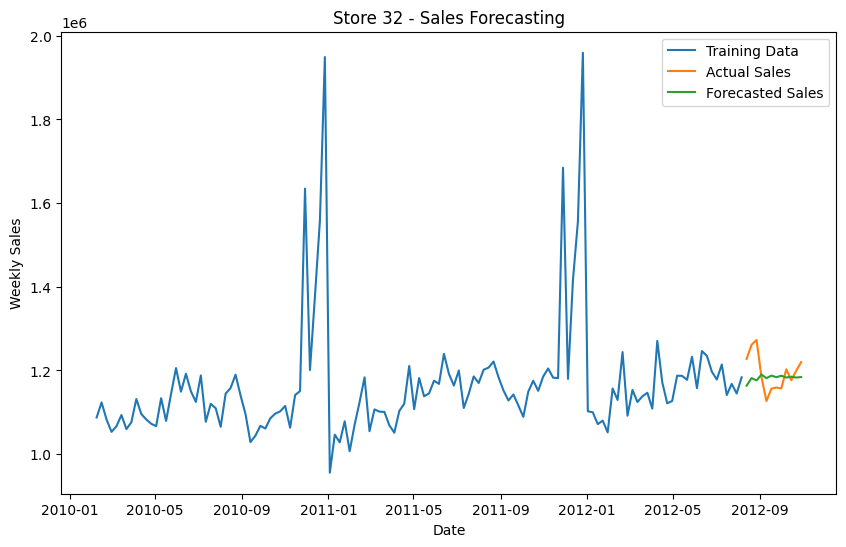

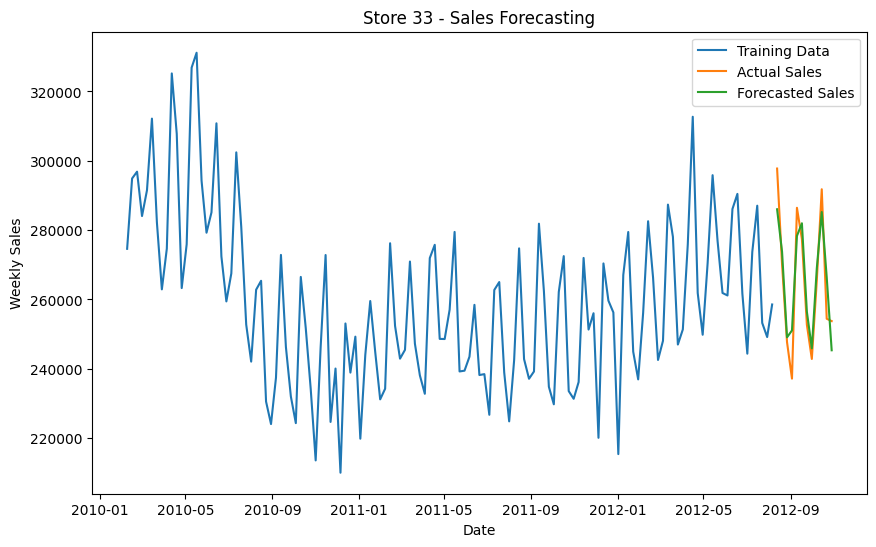

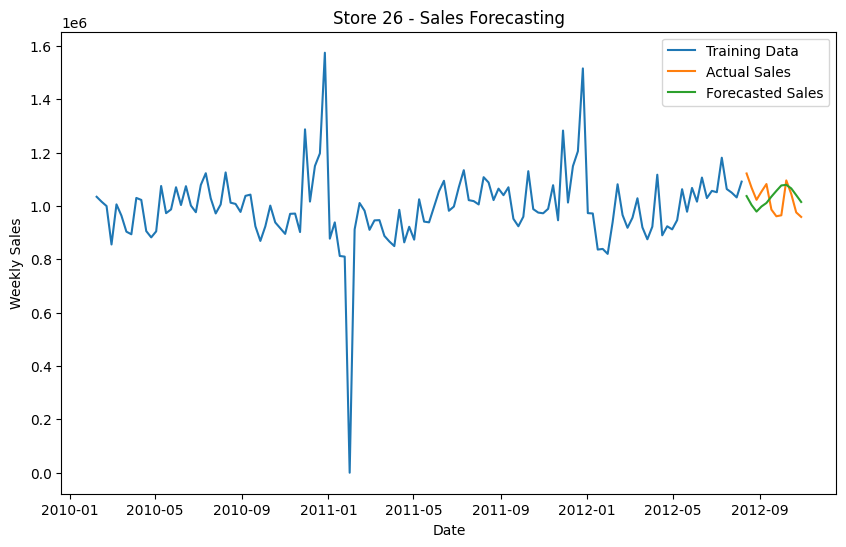

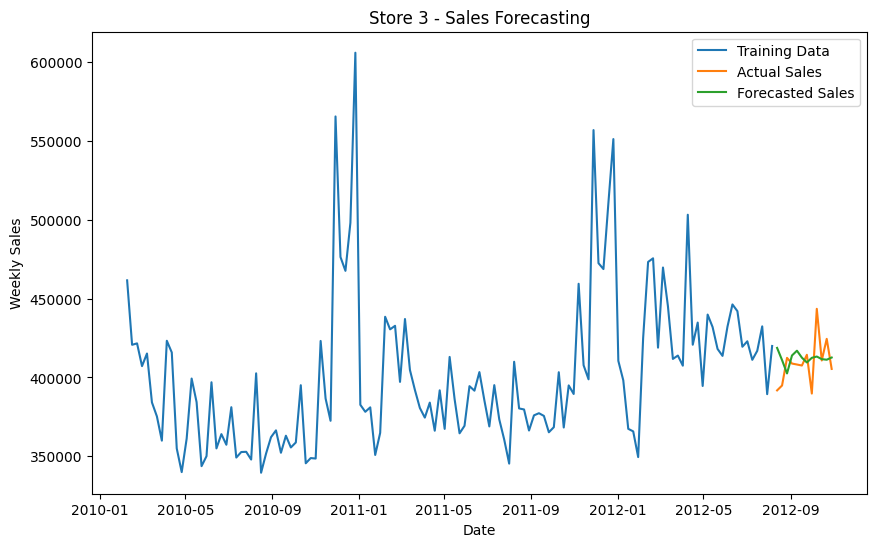

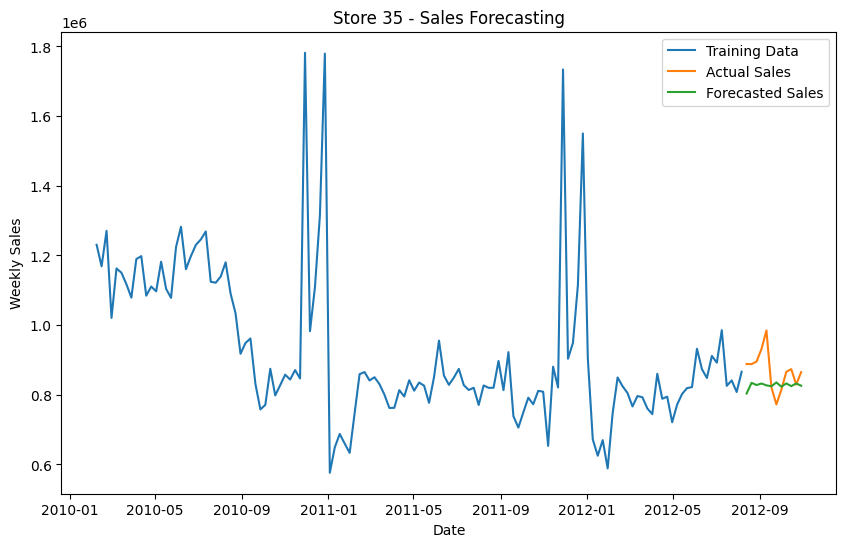

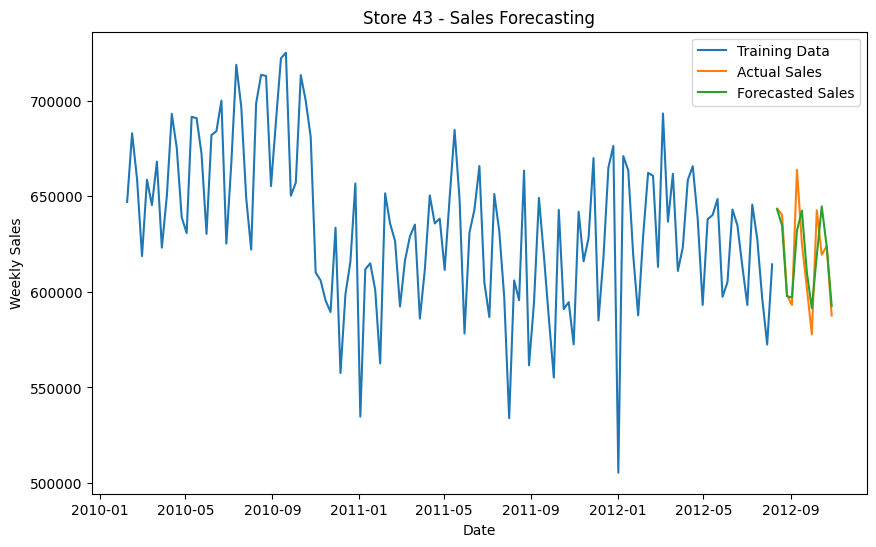

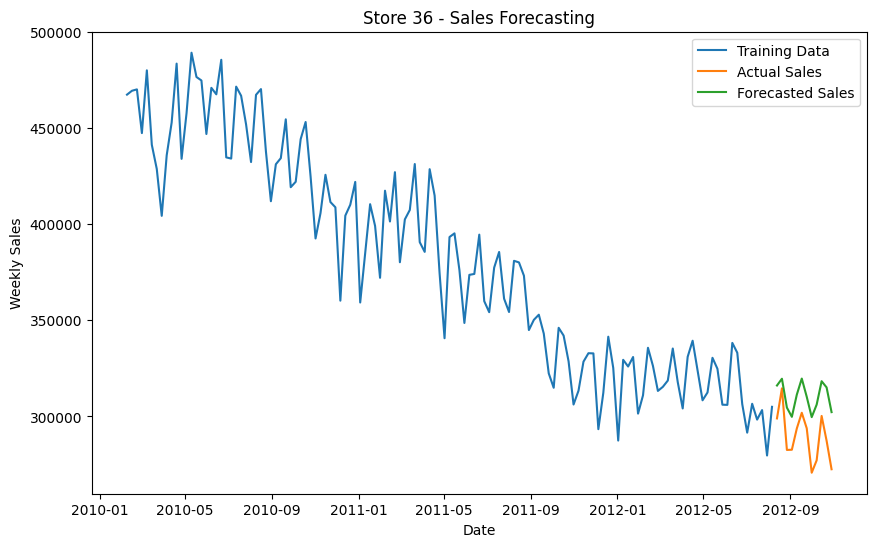

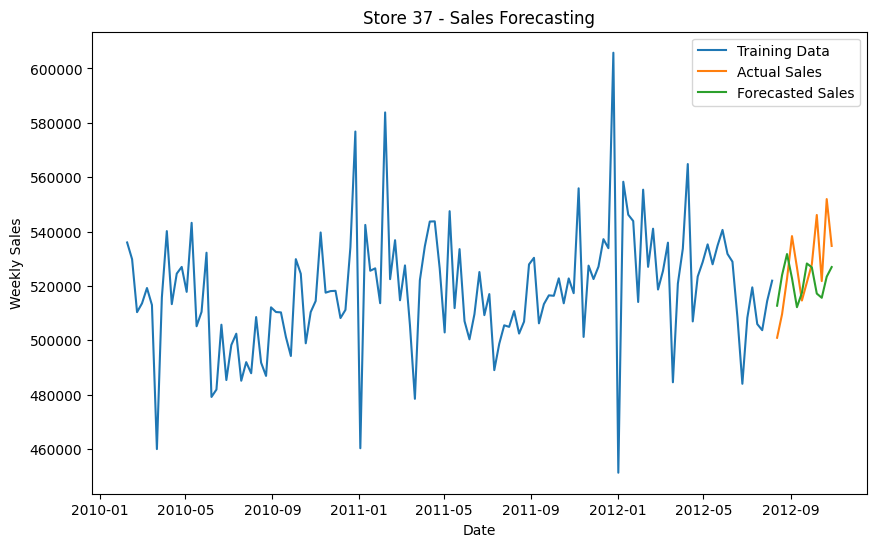

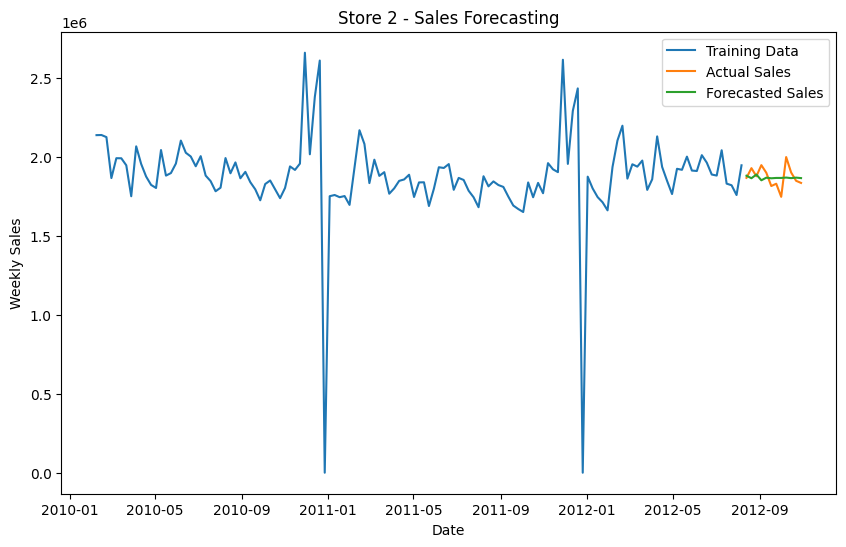

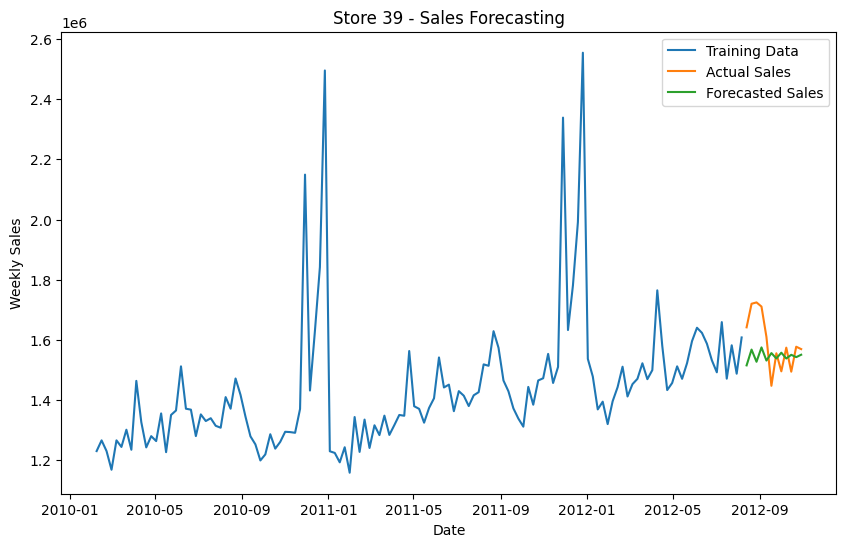

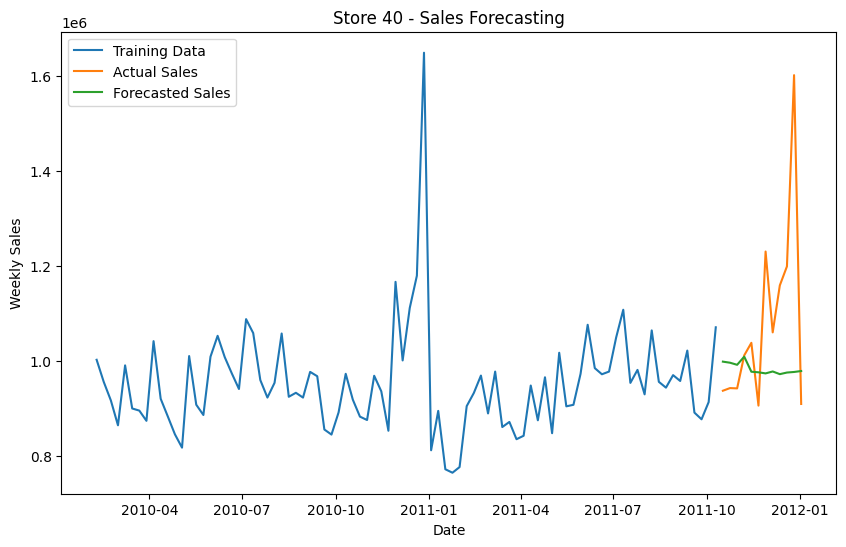

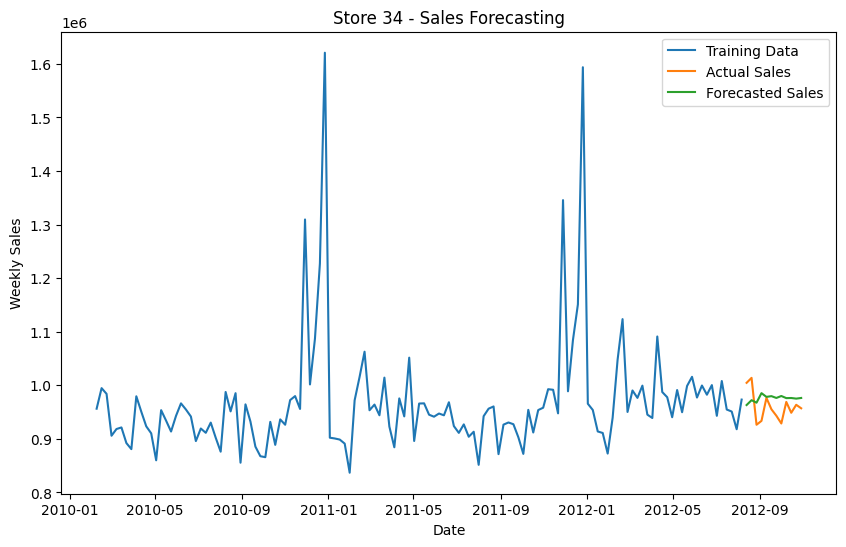

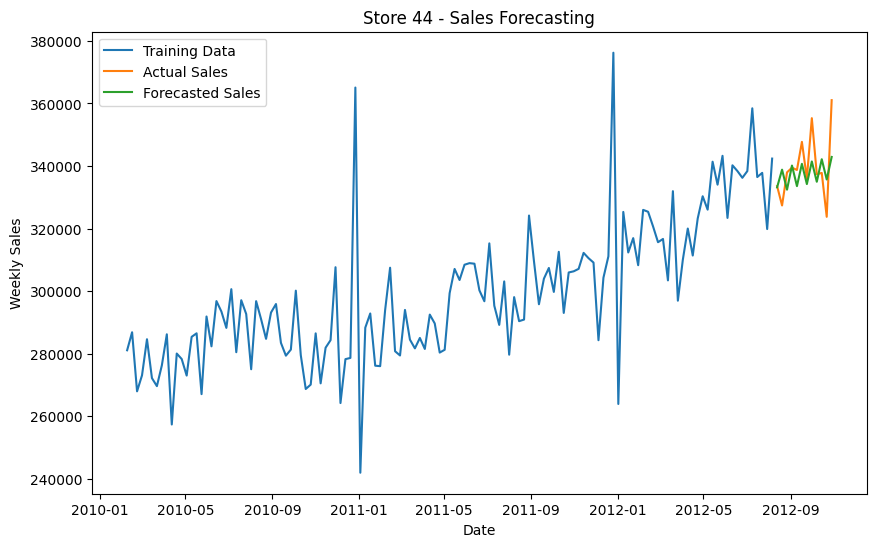

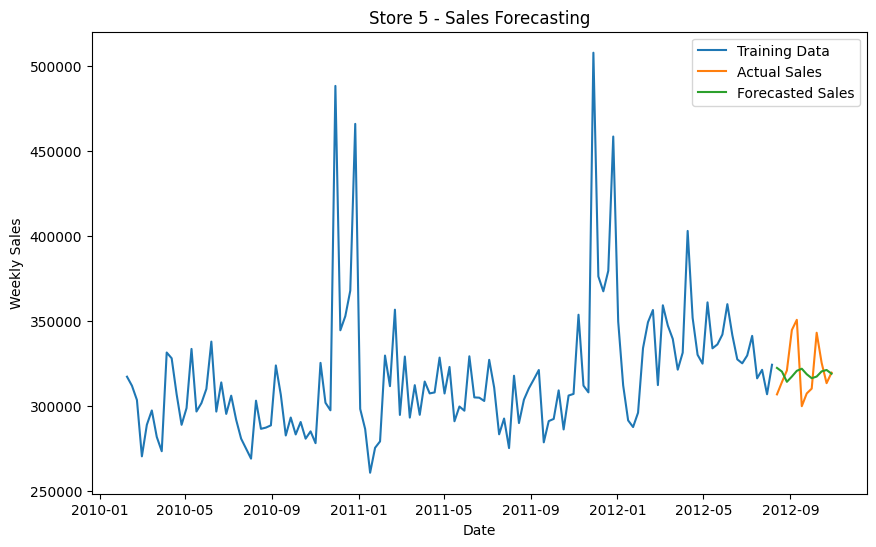

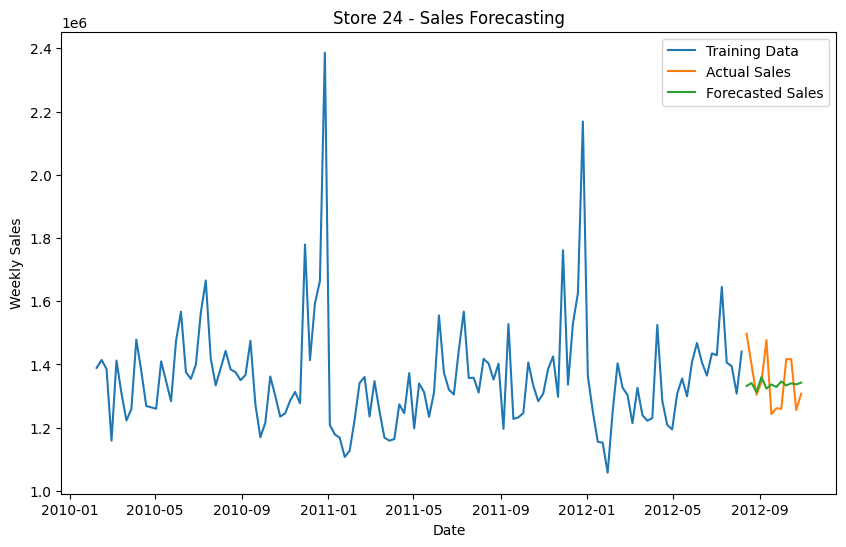

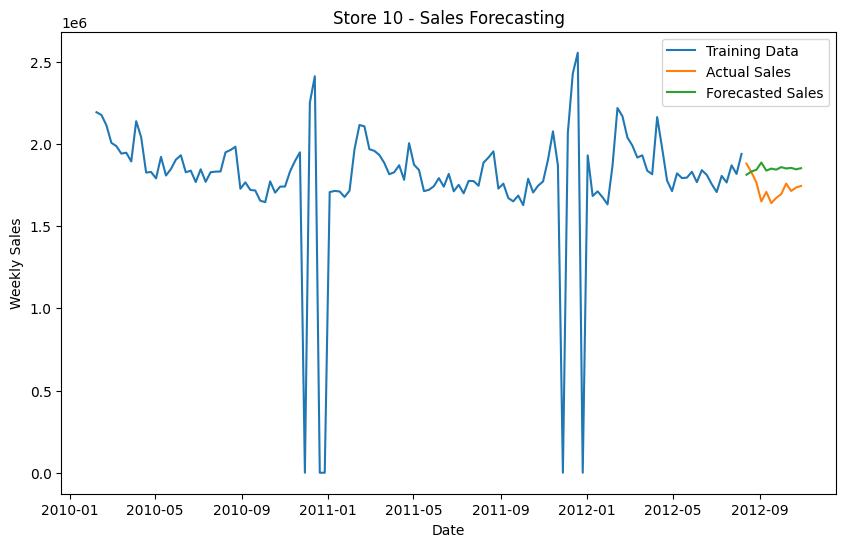

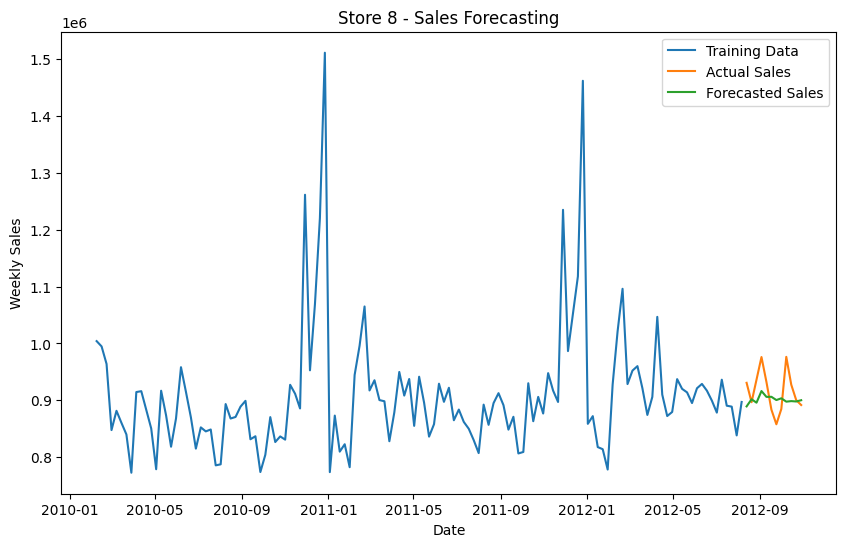

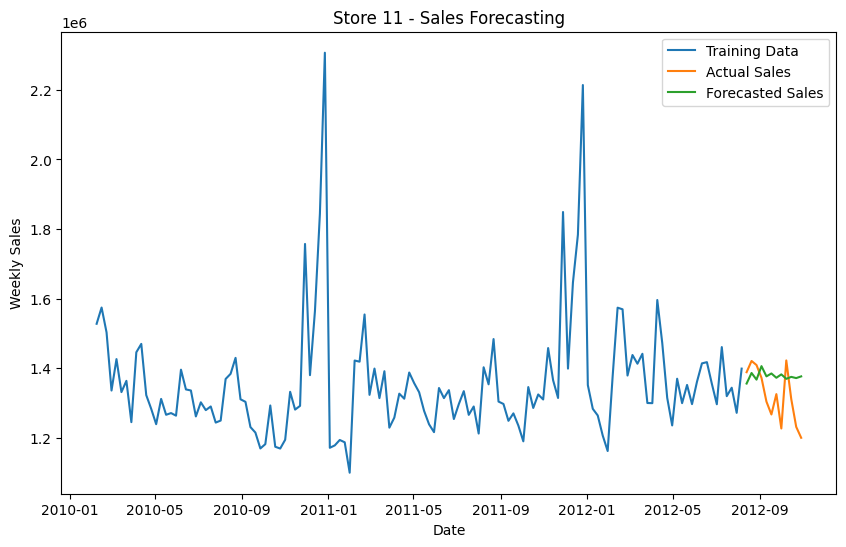

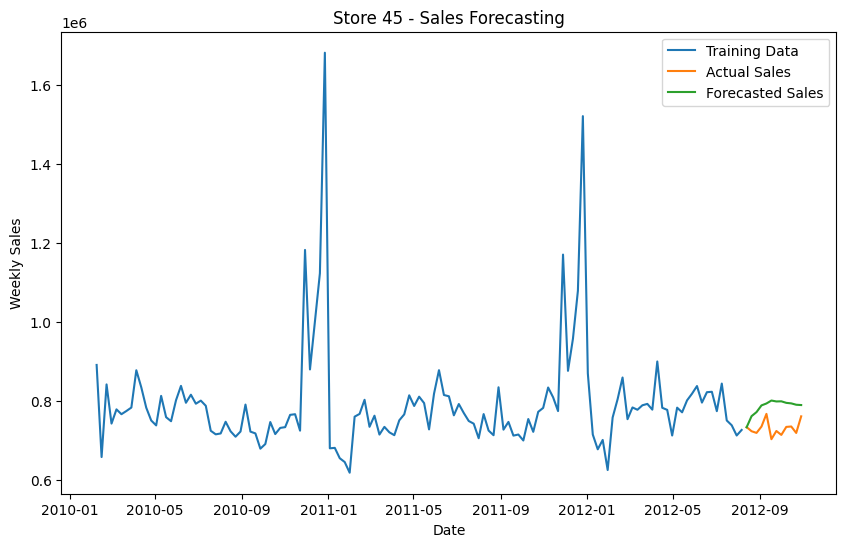

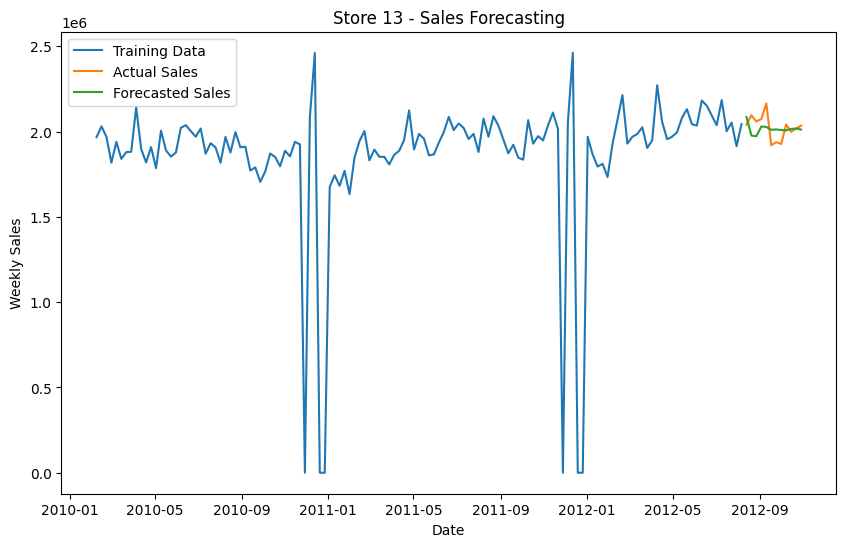

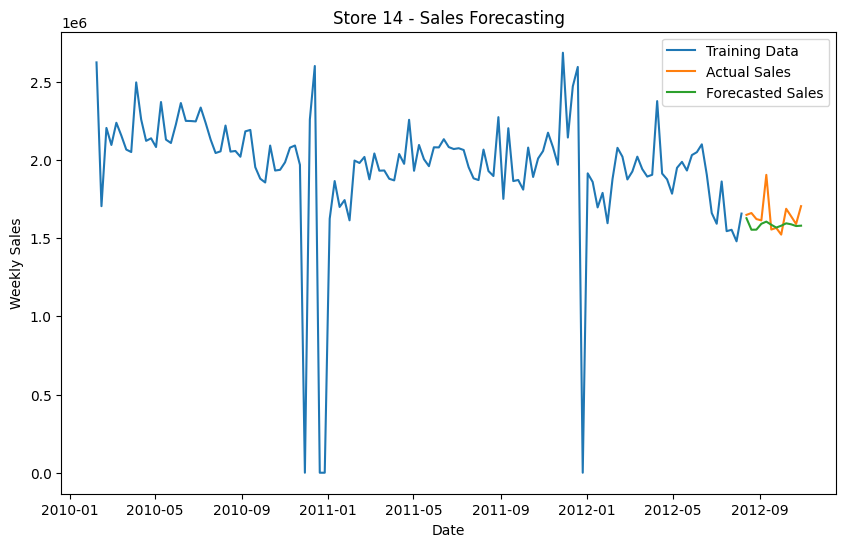

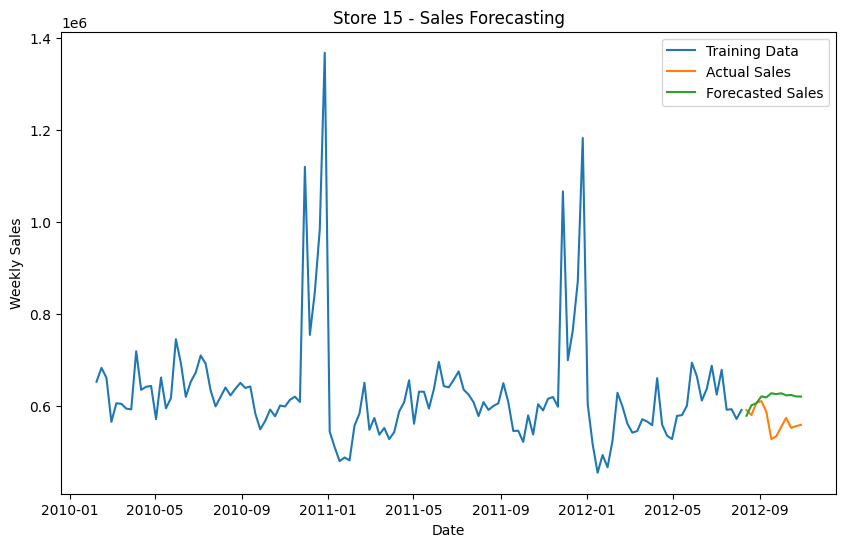

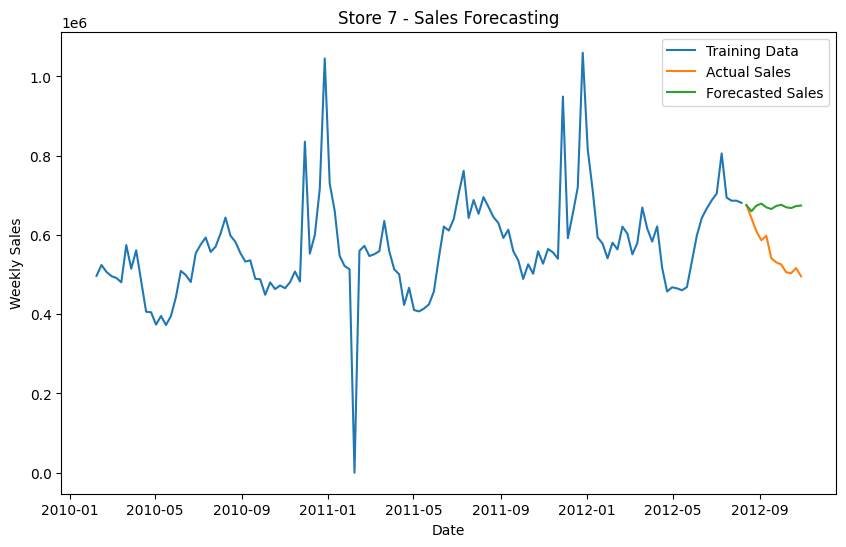

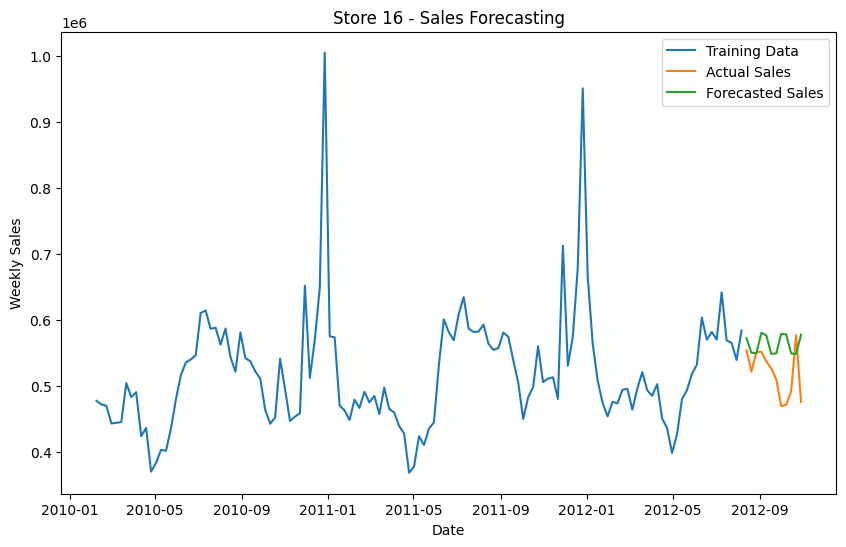

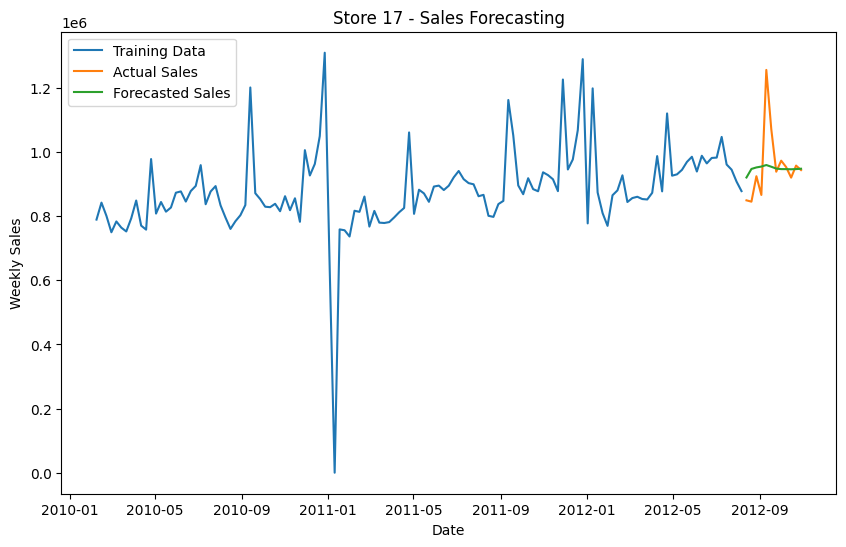

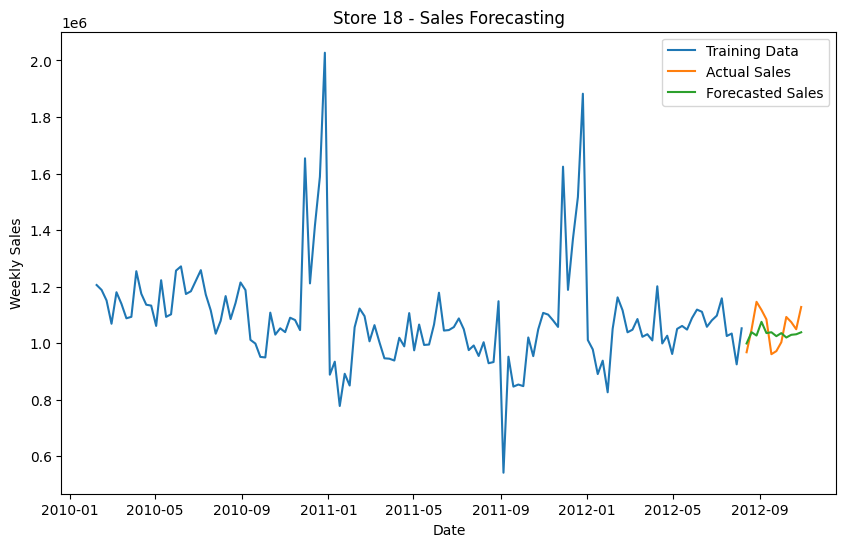

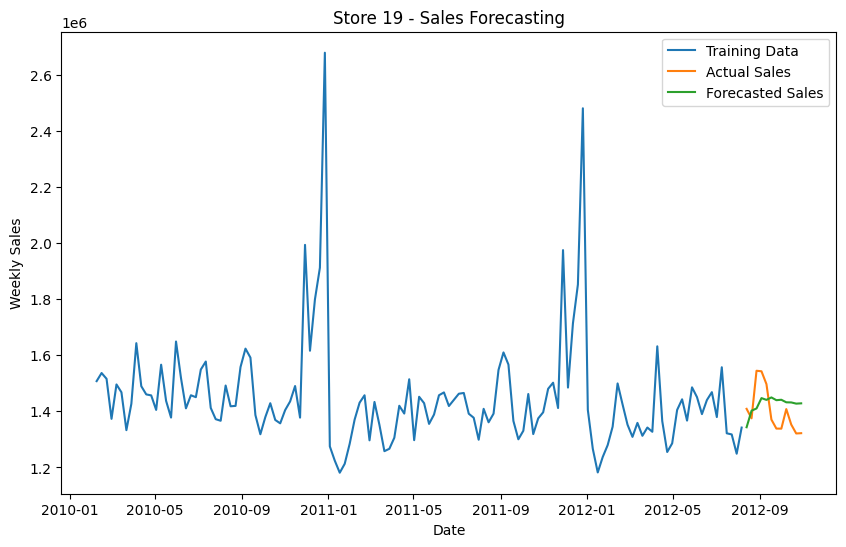

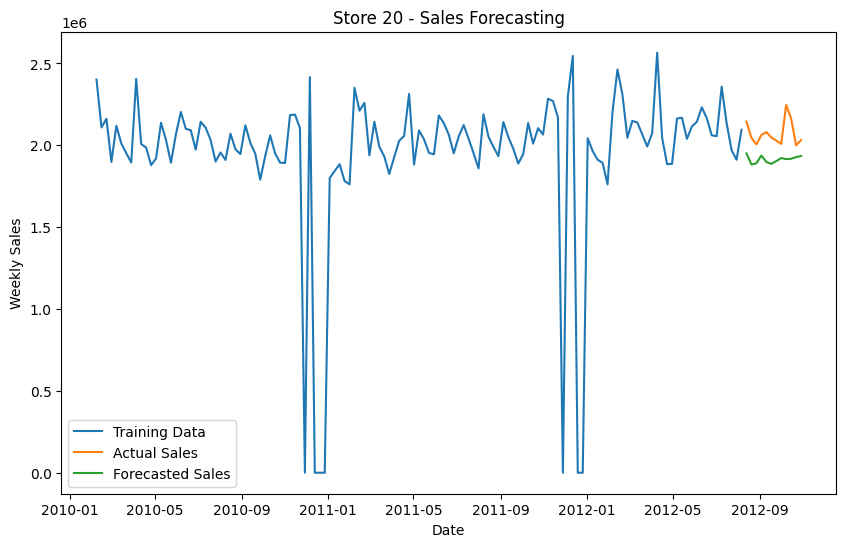

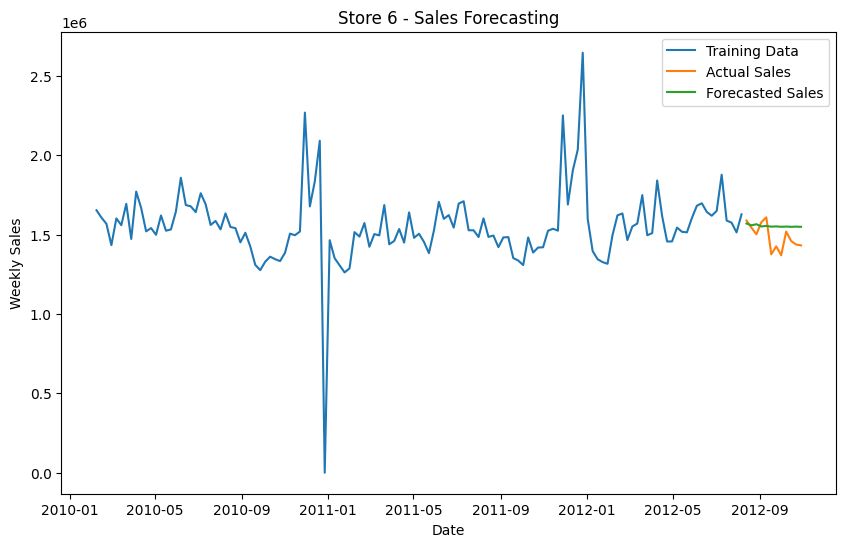

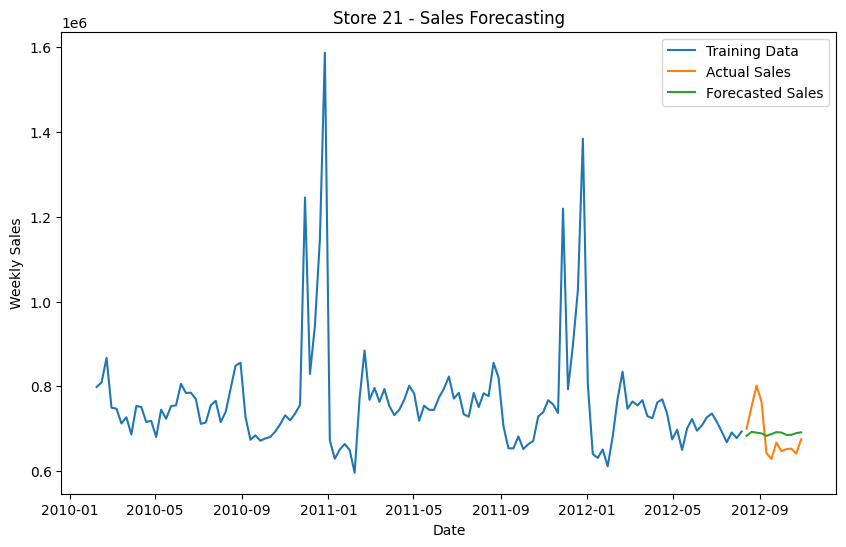

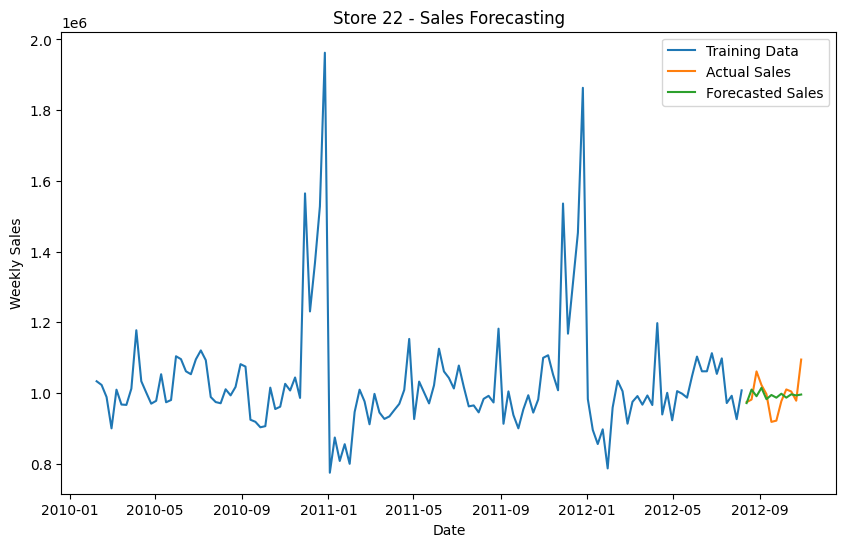

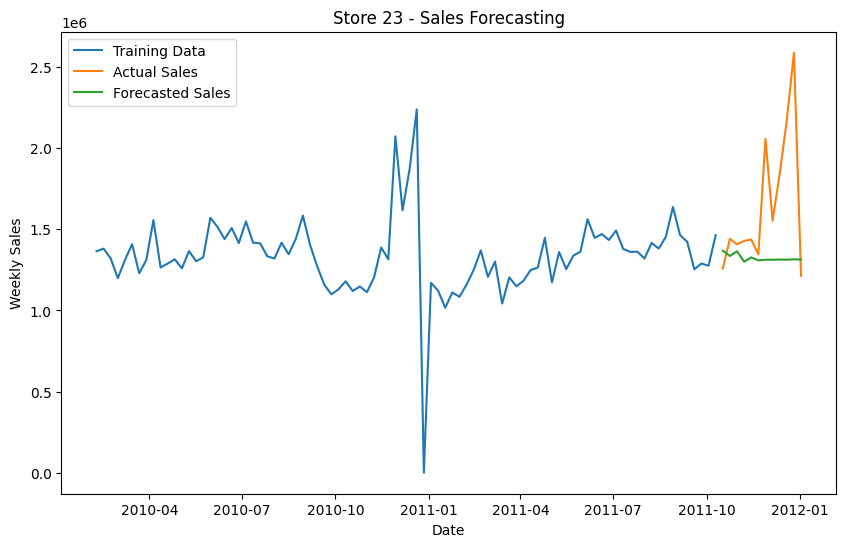

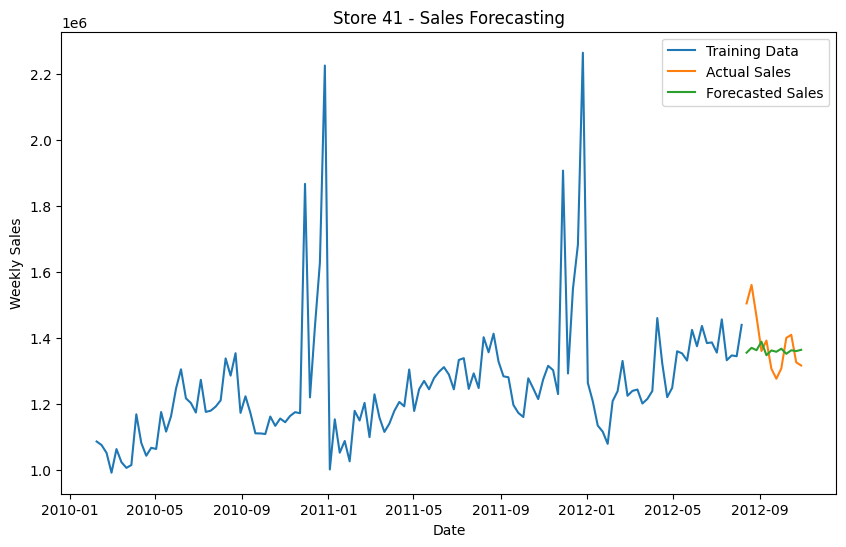

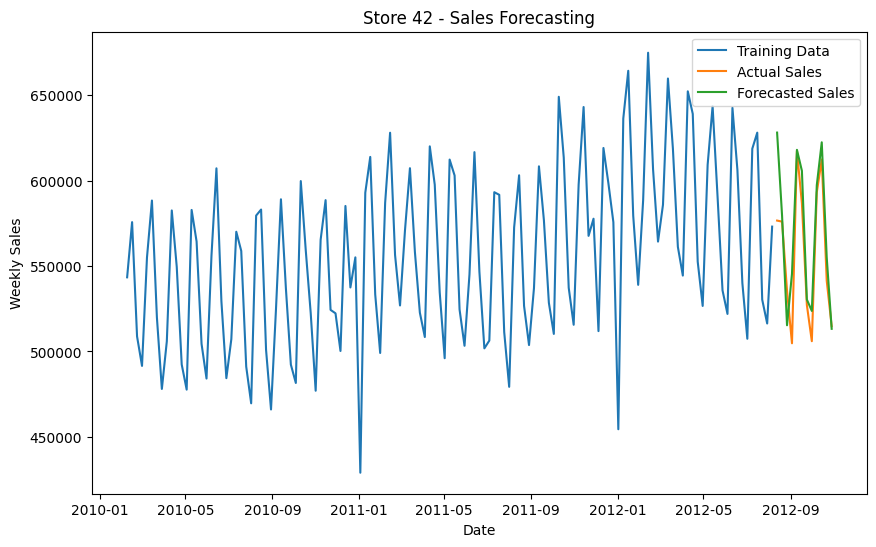

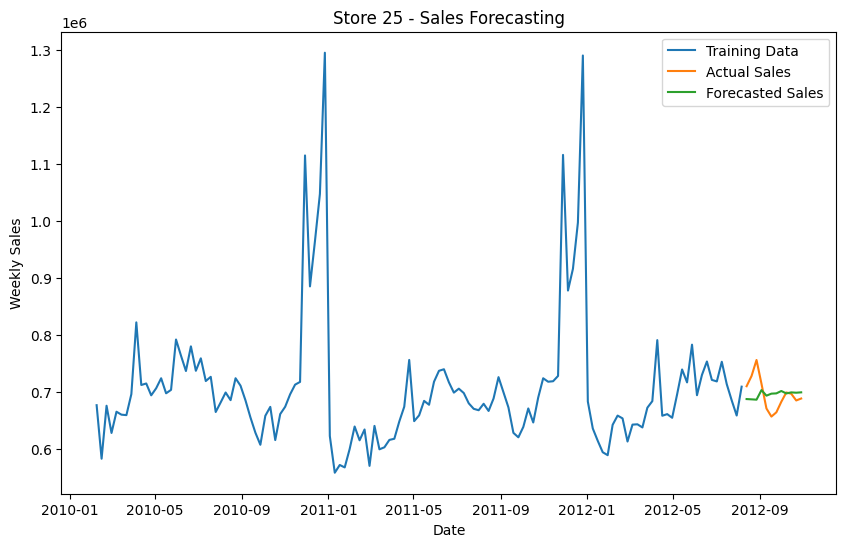

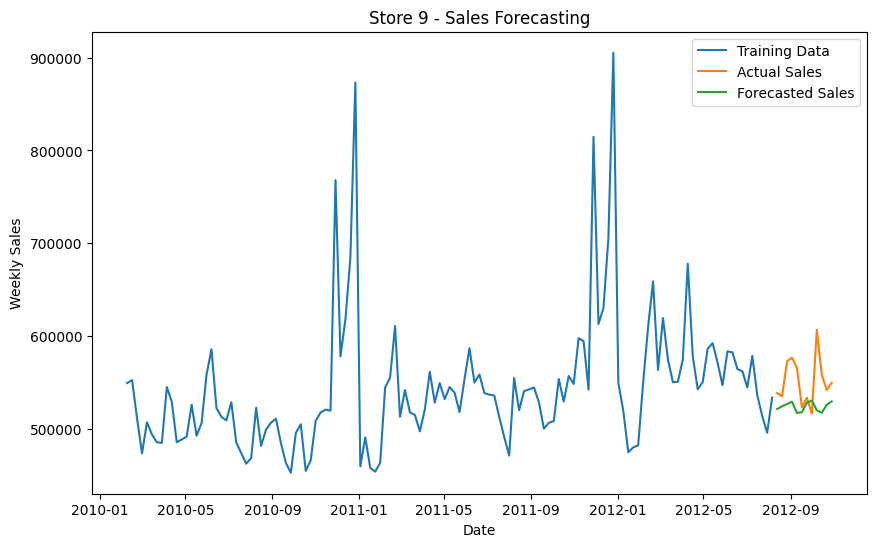

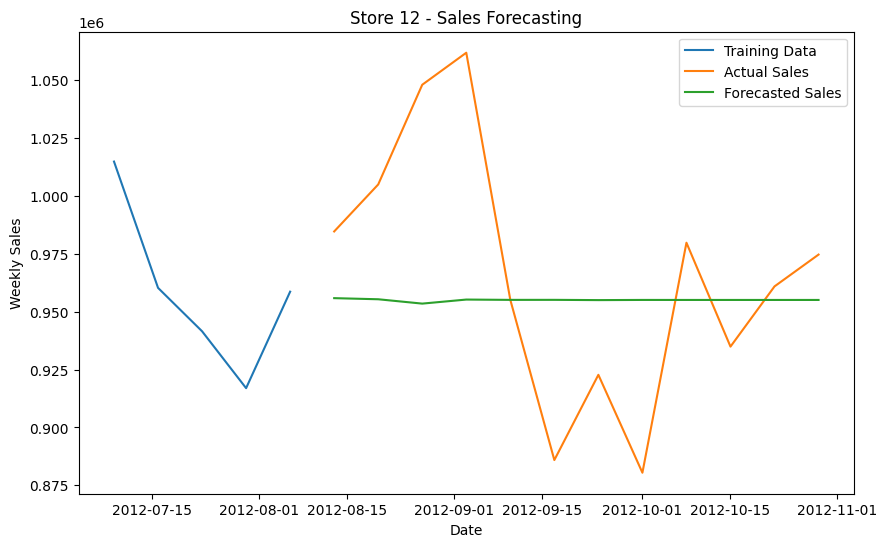

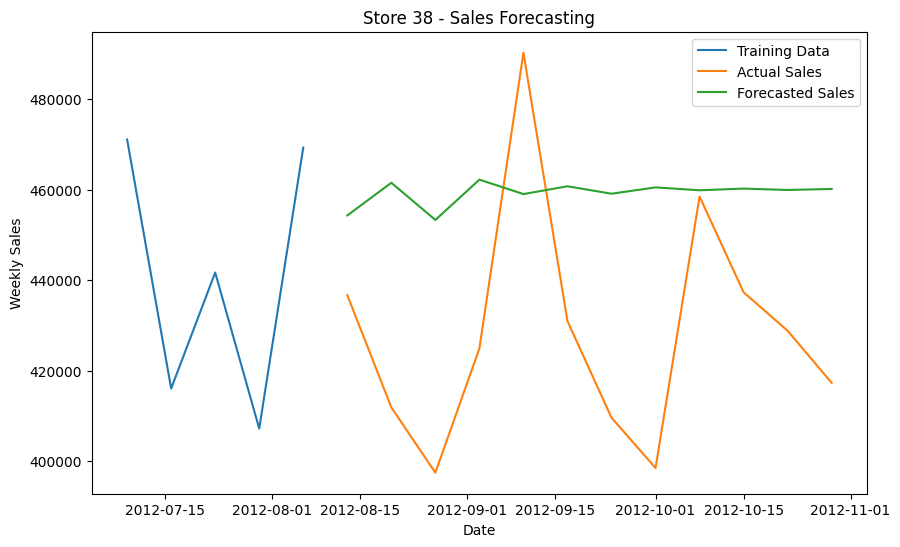

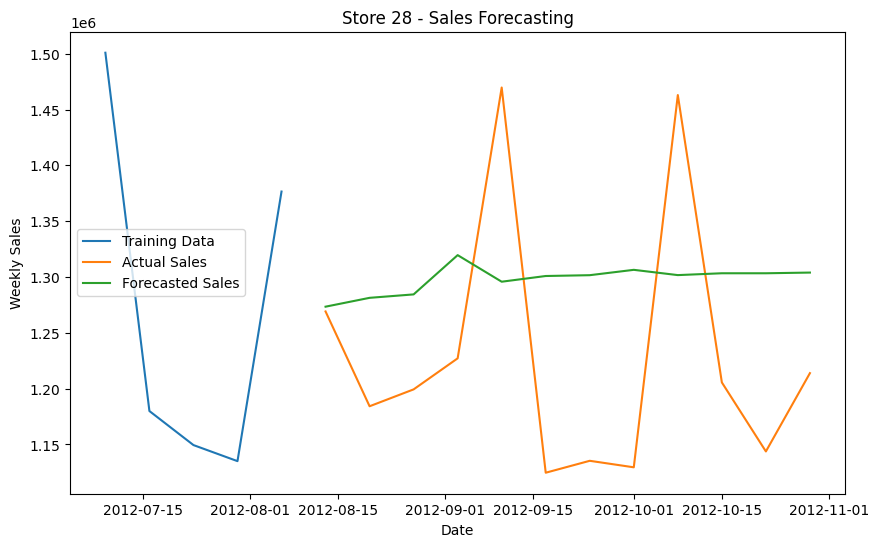

In [65]:
for store, datasets in forecast_results.items():
    train_data = datasets['train_data']
    test_data = datasets['test_data']
    forecast = datasets['forecast']
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Weekly_Sales'], label='Training Data')
    plt.plot(test_data.index, test_data['Weekly_Sales'], label='Actual Sales')
    plt.plot(test_data.index, forecast, label='Forecasted Sales')
    plt.title(f'Store {store} - Sales Forecasting')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

--**Evaluation Metrics**

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for store, datasets in forecast_results.items():
    test_data = datasets['test_data']
    forecast = datasets['forecast']
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(test_data, forecast)
    rmse = mean_squared_error(test_data, forecast, squared=False)
    
    print(f'Store {store} - MAE: {mae}, RMSE: {rmse}')


Store 1 - MAE: 71996.53668845288, RMSE: 82935.19556385346
Store 27 - MAE: 92856.39813650535, RMSE: 111411.4608817706
Store 4 - MAE: 185090.5109910576, RMSE: 206010.17700630418
Store 29 - MAE: 38835.06156236224, RMSE: 51026.02764198531
Store 30 - MAE: 11561.098235207275, RMSE: 13590.203292706405
Store 31 - MAE: 38479.24929002238, RMSE: 52572.91955882815
Store 32 - MAE: 38976.43432160021, RMSE: 47732.35340949515
Store 33 - MAE: 6719.541108427654, RMSE: 7783.055758278843
Store 26 - MAE: 61175.9777151366, RMSE: 66719.69344358878
Store 3 - MAE: 12572.535431909482, RMSE: 15524.598292586992
Store 35 - MAE: 55196.11792369929, RMSE: 69743.02646992281
Store 43 - MAE: 11269.476430298868, RMSE: 15351.752656697885
Store 36 - MAE: 20555.79832682251, RMSE: 21708.348919090426
Store 37 - MAE: 12301.552446457781, RMSE: 14965.710547476201
Store 2 - MAE: 53064.009619687255, RMSE: 65887.43011222073
Store 39 - MAE: 85303.47934865869, RMSE: 101909.16752415597
Store 40 - MAE: 145230.60157830265, RMSE: 218183.